#### About

> Recurrent Neural Networks

A Recurrent Neural Network (RNN) is a deep learning architecture designed to model sequential data where the order of the data points is important. RNNs are able to capture temporal dependencies and learn patterns in data sequences. They are commonly used in tasks such as natural language processing, speech recognition, time series analysis, etc.

At each time step of an RNN, the input data for that time step is processed by an RNN unit that has a hidden state that captures information from previous time steps. The hidden state at time step t, denoted by h(t), is computed using the input data at time step t, denoted by x(t), and the hidden state at time step t-1, denoted by h(t-1), then the formula :


h(t) = activation_function(W_hh * h(t-1) + W_xh * x(t) + b_h)

y(t) = activation_function(W_hy * h(t) + b_y)
where:

- h(t) is the hidden state at time step t
- x(t) is the input data at time step t
- W_hh is the weight matrix for the hidden state
- W_xh is the weight matrix for the input data
- b_h is the bias term for the hidden state
- y(t) is the output at time step t
- W_hy is the weight matrix for the output
- b_y is the bias term for the output
- activation_function is an activation function applied element-wise


An RNN cell updates its hidden state at each time step, incorporates information from the current input data and previous hidden states, and produces an output at each time step. The hidden state acts as a memory capture context from previous time steps, allowing the RNN to capture sequential data patterns and dependencies.



In [59]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical


In [60]:

# Generate toy data
X = np.random.rand(100, 10, 5)  # Input data with shape (samples, timesteps, features)
y = np.random.randint(0, 2, size=(100,))  # Binary labels


In [61]:
# Convert labels to one-hot encoding
y = to_categorical(y)

In [62]:
# Create and compile the model
model = Sequential()
model.add(SimpleRNN(32, input_shape=(10, 5)))  # Input shape should match the shape of X
model.add(Dense(2, activation='softmax'))  # Output layer with softmax activation for binary classification
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [65]:
history = model.fit(X, y, epochs=10, batch_size=32)


Epoch 1/10
4/4 [==============================] - 0s 7ms/step - loss: 0.6409 - accuracy: 0.5900
Epoch 2/10
4/4 [==============================] - 0s 7ms/step - loss: 0.6344 - accuracy: 0.6200
Epoch 3/10
4/4 [==============================] - 0s 6ms/step - loss: 0.6296 - accuracy: 0.6100
Epoch 4/10
4/4 [==============================] - 0s 5ms/step - loss: 0.6231 - accuracy: 0.6100
Epoch 5/10
4/4 [==============================] - 0s 8ms/step - loss: 0.6173 - accuracy: 0.6200
Epoch 6/10
4/4 [==============================] - 0s 6ms/step - loss: 0.6135 - accuracy: 0.6400
Epoch 7/10
4/4 [==============================] - 0s 8ms/step - loss: 0.6086 - accuracy: 0.6600
Epoch 8/10
4/4 [==============================] - 0s 6ms/step - loss: 0.5985 - accuracy: 0.6800
Epoch 9/10
4/4 [==============================] - 0s 6ms/step - loss: 0.5995 - accuracy: 0.6700
Epoch 10/10
4/4 [==============================] - 0s 8ms/step - loss: 0.6026 - accuracy: 0.6600


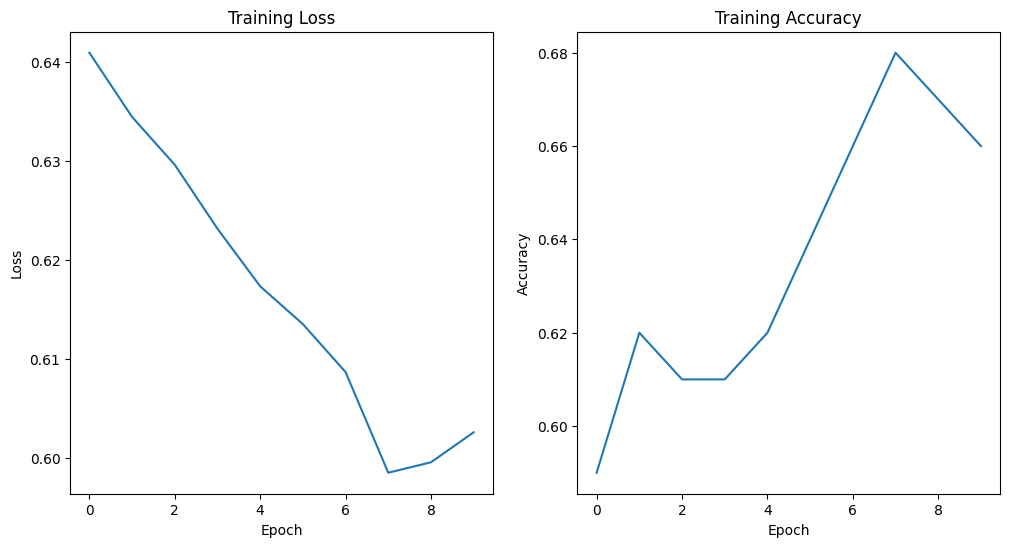

In [68]:
import matplotlib.pyplot as plt

# Plot training loss and accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()



In [69]:
# Predict and print results
y_pred = model.predict(X)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to classes (0 or 1)
print("Predicted Probabilities:")
print(y_pred)
print("Predicted Classes:")
print(y_pred_classes)

4/4 [==============================] - 0s 5ms/step
Predicted Probabilities:
[[0.24437869 0.7556214 ]
 [0.42066333 0.57933664]
 [0.42579657 0.57420343]
 [0.5254216  0.4745784 ]
 [0.49973863 0.50026137]
 [0.14760056 0.8523994 ]
 [0.33271188 0.667288  ]
 [0.20667158 0.79332846]
 [0.43489265 0.5651074 ]
 [0.64426965 0.35573027]
 [0.38502708 0.61497295]
 [0.21037723 0.7896228 ]
 [0.16564074 0.83435935]
 [0.3130886  0.6869113 ]
 [0.33284456 0.66715544]
 [0.35127747 0.64872247]
 [0.36870006 0.63129985]
 [0.12338934 0.87661064]
 [0.3685519  0.63144815]
 [0.2988736  0.70112634]
 [0.59352845 0.40647155]
 [0.48417556 0.51582444]
 [0.25091496 0.74908507]
 [0.19005202 0.809948  ]
 [0.27912495 0.7208751 ]
 [0.19058673 0.8094132 ]
 [0.2850855  0.7149145 ]
 [0.6488684  0.35113168]
 [0.34378883 0.6562112 ]
 [0.29408526 0.7059148 ]
 [0.49663058 0.50336933]
 [0.18437992 0.8156201 ]
 [0.40080723 0.59919274]
 [0.3455527  0.6544473 ]
 [0.3939387  0.60606134]
 [0.4235685  0.57643145]
 [0.11482246 0.88517755]